## Collect dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
file = r'dataset\features\EURUSD.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [2]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
targets = df[['open_24', 'close_24']].copy()*10000


## Normalize data & Split data

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(features.values)
y = sc_y.fit_transform(targets.values)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05)

y_train

array([[-0.27273035, -0.23887738],
       [-0.43412226, -0.43296391],
       [-1.56133304, -1.56087602],
       ...,
       [ 1.21847558,  1.20836808],
       [ 0.19601988,  0.23793544],
       [ 0.0912648 ,  0.14975615]])

In [4]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

open 0: 1917104.887753
high 1: 1943476.142327
low 2: 1972385.571131
close 3: 2005873.872091
WPC 27: 2000905.196916
HA_open 37: 1852772.424703
HA_high 38: 1918453.348826
HA_low 39: 1955695.488258
HA_close 40: 1984545.840004
EMA_4 53: 1953382.390715
EMA_8 54: 1866173.697395
EMA_16 55: 1709591.542143
EMA_32 56: 1466690.509060
bb_bbm_4 57: 1925505.201530
bb_bbh_4 58: 1797970.851320
bb_bbl_4 59: 1855291.885584
bb_bbm_8 60: 1814599.775826
bb_bbh_8 61: 1623167.297240
bb_bbl_8 62: 1695676.840000
bb_bbm_16 63: 1622949.074748
bb_bbh_16 64: 1380942.943167
bb_bbl_16 65: 1463125.622947
bb_bbm_32 66: 1344017.117682
bb_bbh_32 67: 1085541.042597
bb_bbl_32 68: 1163810.373886


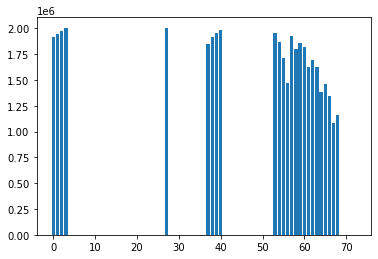

In [5]:
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(x_train, y_train[:,0], x_test)
fea = features.columns.values
features_selection = []
for i in range(len(fs.scores_)):
	if fs.scores_[i] > 10000:
		features_selection.append(fea[i])
		print('%s %d: %f' % (fea[i],i, fs.scores_[i]))
	
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
print(len(features_selection))
print(features.shape)

25
(35506, 73)
